### Задача про отравленную бутылку вина

Вечеринка начинается через сутки.
Всего для вечеринки есть $N$ бутылок вина, но одна из них отравлена.  
Есть $m$ лабораторных мышей, каждую из которых можно напоить из любого количества бутылок, но яд действует только через сутки.  
Какое максимальное количество $R$ гарантированно неотравленных бутылок можно будет взять на вечеринку через сутки?


In [1]:
import numpy as np
from sympy import *
from IPython.display import Math
import matplotlib.pyplot as plt

In [2]:
N = 30
m = 4

Разделим $N$ бутылок на $G$ по возможности равных групп по $B$ бутылок в каждой.  
При этом желательно использовать максимально возможное количество групп $G_{max}$ при заданном числе мышей $m$ равное:
> $G_{max} = 2^m-1$

В каждой группе будет $B$ бутылок:

> $\displaystyle{B = \bigg\lfloor \frac{N}{G_{max}} + \frac{1}{2} \bigg\rfloor}$

Всего групп:

> $\displaystyle{G = \bigg\lfloor \frac{N}{B} + \frac{1}{2} \bigg\rfloor}$


In [3]:
Gmax = 2**m - 1
B = np.floor((N / Gmax) + 1/2).astype('I')
G = np.floor((N / B) + 1/2).astype('I')

display(Math("G_{max} = %d" % Gmax))
display(Math("B = %d" % B))
display(Math("G = %d" % G))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---
#### Алгоритм решения
Создадим матрицу соответствия мышей и групп бутылок - $A\colon ~ m \times G \to \mathbb{F_2}$  
Строки матрицы соответствуют мышам: $M_{i} = \{ M_1, M_2, ... , M_m \}$  
Столбцы матрицы соответствуют группам бутылок: $BG_{j} = \{ BG_1, BG_2, ... , BG_G \}$

Если в двоичном представлении номера группы $j$ в бите $i$ стоит 1, то в соответствующую ячейку матрицы $A(i,j)$ мы записываем 1, в противном случае 0.


In [4]:
A = np.fromfunction(lambda i,j: (j + 1) >> i & 1, (m, G), dtype='B')

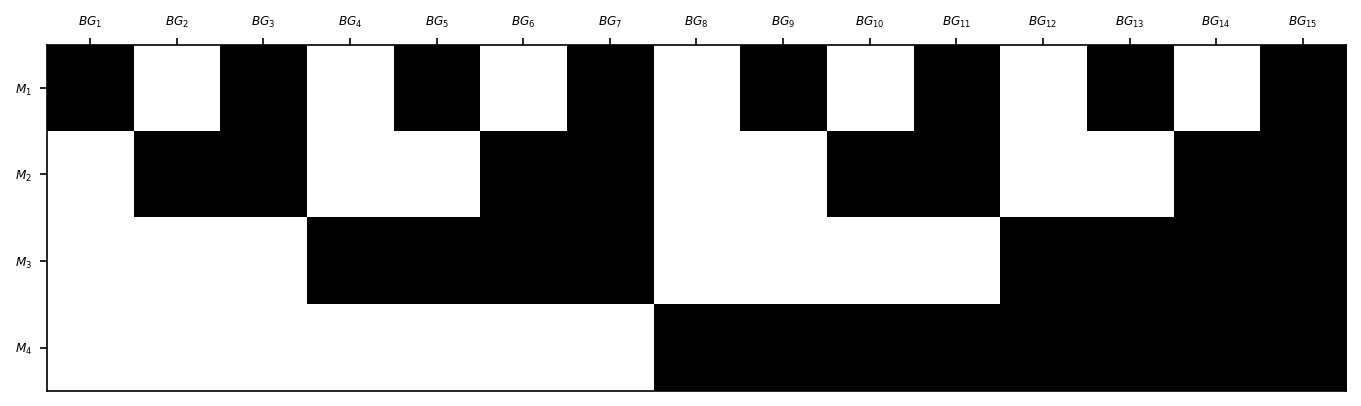

In [5]:
fig = plt.figure(figsize=(15,3), dpi=150)
ax = fig.add_subplot()

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_ticks(np.arange(G))
ax.xaxis.set_major_formatter(lambda x,pos: "$BG_{%d}$" % (x + 1))

ax.yaxis.set_ticks(np.arange(m))
ax.yaxis.set_major_formatter(lambda x,pos: "$M_{%d}$" % (x + 1))

ax.tick_params(labelsize='xx-small')

img = ax.imshow(A, cmap='binary')

В соответствии с полученной матрицей каждая мышь $M_i$ пробует вино из тех групп бутылок, напротив которых в матрице стоит 1.  

То есть:
- $M_1$ пробует из $\{BG_1, BG_3, BG_5, BG_7, ... \}$  
- $M_2$ пробует из $\{BG_2, BG_3, BG_6, BG_7, ... \}$  
- $M_3$ пробует из $\{BG_4, BG_5, BG_6, BG_7, ... \}$  
- ...

По истечении суток по одной из $G$ возможных комбинаций дохлых мышей определяем группу в которой находится отравленная бутылка.
Число оставшихся неотравленных бутылок равно:

> $R = N - B$


In [6]:
R = N - B

display(Math("R = %d" % R))

<IPython.core.display.Math object>